<a href="https://colab.research.google.com/github/aSafarpoor/OSN_FAD/blob/main/CLS/Heeb/Twitter_Dataset_analysis_b_(just_train).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt

In [1]:
with open("test.txt", "r") as file:
    # Read the first two lines and strip any newline characters
    line1 = file.readline().strip()
    line2 = file.readline().strip()

    # Split the lines into lists of integers
    btest = list(map(int, line1.split()))
    stest = list(map(int, line2.split()))

# Print the lists to verify
print("List 1 B: ", len(btest))
print("List 2 S: ", len(stest))

List 1 B:  158377
List 2 S:  81263


In [2]:
with open("train.txt", "r") as file:
    # Read the first two lines and strip any newline characters
    line1 = file.readline().strip()
    line2 = file.readline().strip()

    # Split the lines into lists of integers
    btrain = list(map(int, line1.split()))
    strain = list(map(int, line2.split()))

# Print the lists to verify
print("List 1 B: ", len(btrain))
print("List 2 S: ", len(strain))

List 1 B:  20000
List 2 S:  10000


In [3]:
with open("test_full.txt", "r") as file:
    # Read the first two lines and strip any newline characters
    line1 = file.readline().strip()
    line2 = file.readline().strip()

    # Split the lines into lists of integers
    bfull = list(map(int, line1.split()))
    sfull = list(map(int, line2.split()))

# Print the lists to verify
print("List 1 B: ", len(bfull))
print("List 2 S: ", len(sfull))

List 1 B:  178377
List 2 S:  91263


In [4]:
with open("graph.txt", "r") as file:
    edges = [list(map(int, line.strip().split())) for line in file]

print("Graph Data:", len(edges))

Graph Data: 6818501


In [6]:
edges = np.array(edges)

In [9]:
nodes1 = btrain+strain+btest+stest
print(len(nodes1))
nodes1 = list(set(nodes1))
print(len(nodes1))


269640
269640


In [12]:
nodes2 = list(set(list(edges.reshape(-1))))
len(nodes2)

269640

In [16]:
G = nx.Graph()
G.add_edges_from(edges)

In [17]:
degree_dict = dict(G.degree())

In [58]:
sybils = strain
print(len(sybils))

benigns = btrain
print(len(benigns))

10000
20000


100%|██████████| 20000/20000 [00:00<00:00, 995822.31it/s]


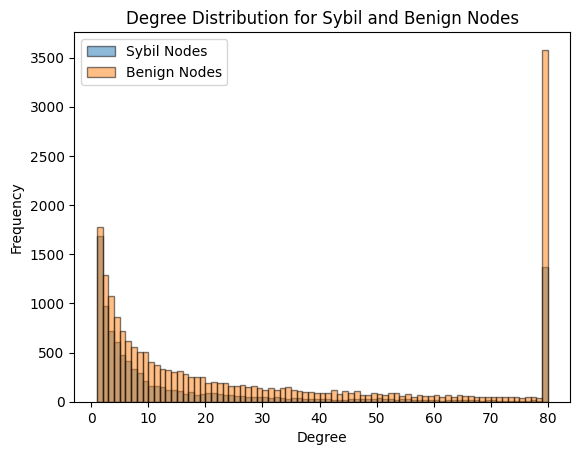

In [59]:
sdegree_list = [min(degree_dict[node], 80) for node in tqdm(sybils) if node in degree_dict]
bdegree_list = [min(degree_dict[node], 80) for node in tqdm(benigns) if node in degree_dict]


# Plot the histograms
plt.hist(sdegree_list, bins=range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1),
         alpha=0.5, label='Sybil Nodes', edgecolor='black')
plt.hist(bdegree_list, bins=range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1),
         alpha=0.5, label='Benign Nodes', edgecolor='black')

# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()

100%|██████████| 20000/20000 [00:00<00:00, 973642.07it/s]


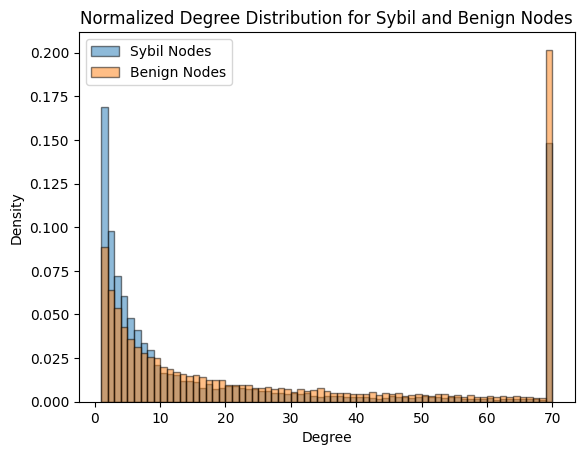

In [60]:
sdegree_list = [min(degree_dict[node], 70) for node in tqdm(sybils) if node in degree_dict]
bdegree_list = [min(degree_dict[node], 70) for node in tqdm(benigns) if node in degree_dict]

# Define the bins
bins = range(min(sdegree_list + bdegree_list), max(sdegree_list + bdegree_list) + 1)

# Plot the normalized histograms
plt.hist(sdegree_list, bins=bins, alpha=0.5, label='Sybil Nodes', edgecolor='black', density=True)
plt.hist(bdegree_list, bins=bins, alpha=0.5, label='Benign Nodes', edgecolor='black', density=True)

# Add labels and legend
plt.xlabel("Degree")
plt.ylabel("Density")
plt.title("Normalized Degree Distribution for Sybil and Benign Nodes")
plt.legend()

# Show the plot
plt.show()


In [61]:
sdegree_list = [degree_dict[node] for node in tqdm(sybils)]
bdegree_list = [degree_dict[node] for node in tqdm(benigns)]

# Calculate average degrees
sdegree_avg = sum(sdegree_list) / len(sdegree_list)
bdegree_avg = sum(bdegree_list) / len(bdegree_list)

print("\nAverage degree for sybils:", sdegree_avg)
print("Average degree for benigns:", bdegree_avg)


100%|██████████| 20000/20000 [00:00<00:00, 1286872.64it/s]


Average degree for sybils: 57.3123
Average degree for benigns: 71.45495


In [62]:
max_degree = max(dict(G.degree()).values())
max_degree

22874

In [63]:
def less_than_x(x,sdegree_list,bdegree_list):

    sdegree_less_than_x = sum(1 for degree in sdegree_list if degree <= x) / len(sdegree_list) * 100
    bdegree_less_than_x = sum(1 for degree in bdegree_list if degree <= x) / len(bdegree_list) * 100

    # Print the results
    # print(f"Percentage of sybil nodes with degree less than or equal to {x}: {sdegree_less_than_x:.2f}%")
    # print(f"Percentage of benign nodes with degree less than or equal to {x}: {bdegree_less_than_x:.2f}%")

    return sdegree_less_than_x,bdegree_less_than_x

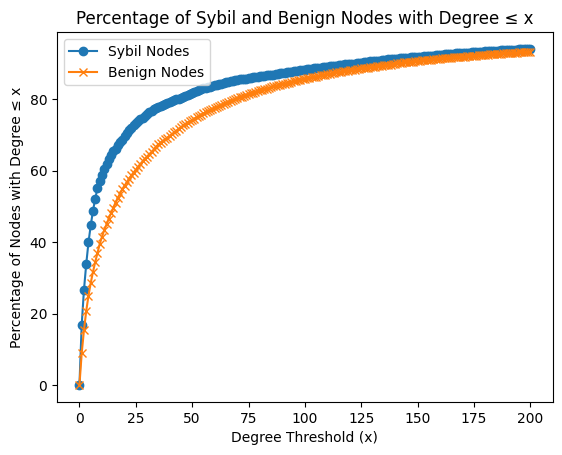

In [64]:
x_values = list(range(200+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent, b_percent = less_than_x(x, sdegree_list, bdegree_list)
    sdegree_percentages.append(s_percent)
    bdegree_percentages.append(b_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')
plt.plot(x_values, bdegree_percentages, marker='x', label='Benign Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()

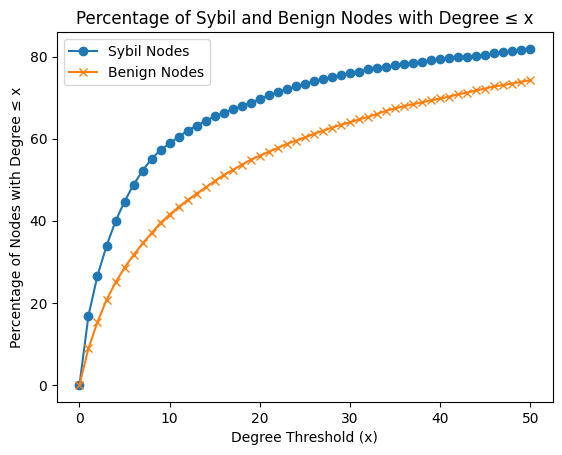

In [65]:
x_values = list(range(50+1))
sdegree_percentages = []
bdegree_percentages = []

for x in x_values:
    s_percent, b_percent = less_than_x(x, sdegree_list, bdegree_list)
    sdegree_percentages.append(s_percent)
    bdegree_percentages.append(b_percent)

# Plot the results
plt.plot(x_values, sdegree_percentages, marker='o', label='Sybil Nodes')
plt.plot(x_values, bdegree_percentages, marker='x', label='Benign Nodes')

# Add labels, title, and legend
plt.xlabel("Degree Threshold (x)")
plt.ylabel("Percentage of Nodes with Degree ≤ x")
plt.title("Percentage of Sybil and Benign Nodes with Degree ≤ x")
plt.legend()

# Show the plot
plt.show()